# Day26 Stepstone Posting 
# 達石職缺

In [1]:
# 載入所需套件 import the packages we need
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py 

import warnings # 忽略警告訊息 
warnings.filterwarnings("ignore") 

In [2]:
# 讀入昨天存的檔案來分析 read in the file we created yesterday
df = pd.read_csv('df.csv') 
df.info() # 查看資料細節 the info of data
df.head(3) # 叫出前三筆資料看看 print out the top three rows of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
Unnamed: 0     100 non-null int64
Jobs           100 non-null object
Company        100 non-null object
Location       100 non-null object
Description    100 non-null object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


,Unnamed: 0,Jobs,Company,Location,Description
0,0,Junior Data Scientist (m/w/d) Medical Devices,Fresenius Medical Care Deutschland GmbH,Berlin,Unser Bewerbungsprozess läuft standardisiert i...
1,1,(Junior) Data Scientist (m/w/d),4flow,Berlin,4flow * Berlin * Feste Anstellung * Vollzeit -...
2,2,Physiker/ Mathematiker/ Naturwissenschaftler a...,Senacor Technologies AG,"Berlin, Bonn, Frankfurt, Hamburg, Leipzig, Mün...",Du modellierst Datenbanken basierend auf unter...


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

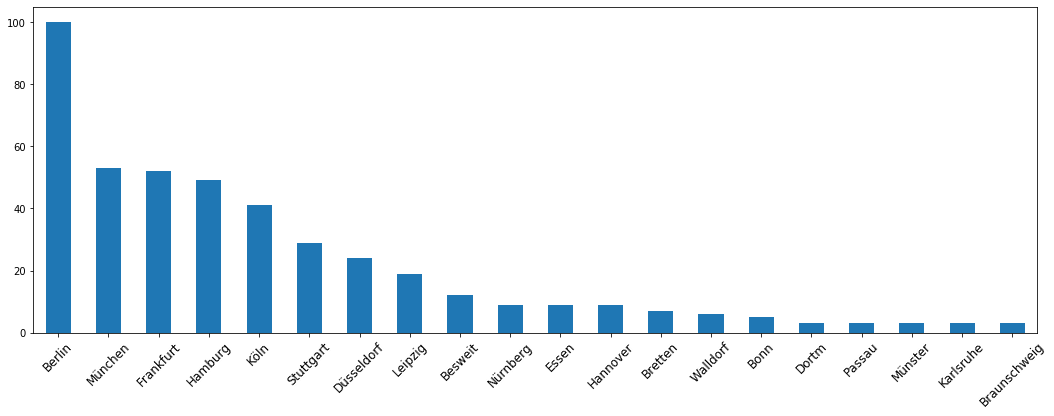

In [3]:
# 把地點分布畫出來，看看這些職缺除了在柏林以外其他地點也有職缺的情形
# plot out to see how the locations look like
df['Location'] = df.Location.str.replace('Munich', 'München').str.replace(' a. M.', ' ').str.replace('a. M.', ' ').str.replace(' am Main', ' ').str.replace(' a.M.', ' ').str.replace('/M.', ' ').str.replace(' in ', '').str.replace(' in', '').str.replace('Alle', ' ').str.replace(' bei', '').str.replace('oder', '').str.replace('und', '').str.replace('/', ' ').str.replace(',', ' ').str.replace('   ', ' ').str.replace(' /M.', '.a.M.').str.replace('oder', '').str.replace('und', '').str.replace('/', ' ').str.replace(',', ' ').str.replace('  ', ' ').str.replace(' ', ',')
df.Location.head(3)
all_item_ls = np.concatenate(df.Location.map(lambda am:am.split(',')))
items = pd.Series(all_item_ls).value_counts().head(20)
plt.figure(figsize=(18 , 6))
items.plot(kind='bar')
plt.xticks(rotation=45, fontsize=12)

In [4]:
# 看看這些職缺簡介都寫了些什麼字
# see the word counts of the job posting descriptions
df['Description'] = df.Description.str.replace('(', '').str.replace(')', '').str.replace(',', '').str.replace('.', '').str.replace('*', '').str.replace('-', ' ').str.replace('&', '').str.replace('   ', ' ').str.replace('  ', ' ').str.replace(' ', ',')
df.Description.head(3)
all_words = np.concatenate(df.Description.map(lambda am:am.split(',')))
words = pd.Series(all_words).value_counts()

In [5]:
words.head(15)

Data          88
und           81
Berlin        41
in            36
von           32
Vollzeit      29
der           28
Anstellung    27
Feste         27
Analytics     25
Sie           23
die           22
Big           22
München       20
für           19
dtype: int64

In [6]:
words.tail(10)

Supports                   1
Governance                 1
Modellierungsparadigmen    1
komplexer                  1
nachhaltiger               1
Workflows                  1
variety                    1
actionable                 1
Braunschweig               1
technologischen            1
dtype: int64

In [7]:
# 看看職缺標題都寫了些什麼字
# see the word counts of the job postings
df['Jobs'] = df.Jobs.str.replace('(', '').str.replace(')', '').str.replace(',', ' ').str.replace('.', '').str.replace('/', '').str.replace('*', '').str.replace('-', ' ').str.replace('–', ' ').str.replace('&', '').str.replace('   ', ' ').str.replace('  ', ' ').str.replace(' ', ',')
df.Jobs.head(3)
all_jobs = np.concatenate(df.Jobs.map(lambda am:am.split(',')))
jobs = pd.Series(all_jobs).value_counts()

In [8]:
jobs.head(30)

mwd             71
Data            59
Business        35
Analyst         33
Consultant      20
Scientist       17
Analytics       17
Junior          14
Intelligence    13
Engineer        13
wmd             12
Big             12
Developer       10
Senior           9
für              8
Public           7
BI               7
Sector           7
Management       6
und              6
mfd              6
Architect        6
Warehouse        6
SAP              5
Consulting       5
Manager          5
Berater          4
Science          4
Bereich          4
Digital          4
dtype: int64

文中若有錯誤還望不吝指正，感激不盡。
Please let me know if there’s any mistake in this article. Thanks for reading.

Reference 參考資料：

[1] [Tutorial: Python Web Scraping Using BeautifulSoup](https://www.dataquest.io/blog/web-scraping-tutorial-python/)

[2] [Stepstone](https://www.stepstone.de/5/job-search-simple.html?stf=freeText&ns=1&companyid=0&sourceofthesearchfield=resultlistpage%3Ageneral&qs=%5B%5D&ke=Junior%20Data%20Scientist&ws=Berlin&ra=10&suid=b830ebdc-e1ed-43cf-931b-006b0ad341c5&li=100&of=0&action=per_page_changed)
